Datasets :
Data Preprocessing:
Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
Anal.yse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
Cluster_data=pd.read_csv("EastWestAirlines.xlsx - data.csv")

#column rename 
Cluster_data.rename(columns={"ID#":"ID","Award?":"Award"},inplace=True)

# Set index as ID 
Cluster_data.set_index("ID",inplace=True)
Cluster_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [17]:
# checking for missing values
Cluster_data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [18]:
# Data exploration 
Cluster_data.describe()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [19]:
# details of the data
Cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [20]:
# checking for duplicated data
Cluster_data.duplicated().sum()

1

In [21]:
# dropping duplicates data
Cluster_data.drop_duplicates(inplace=True)

Cluster_data.duplicated().sum()

0

# Data Visualization

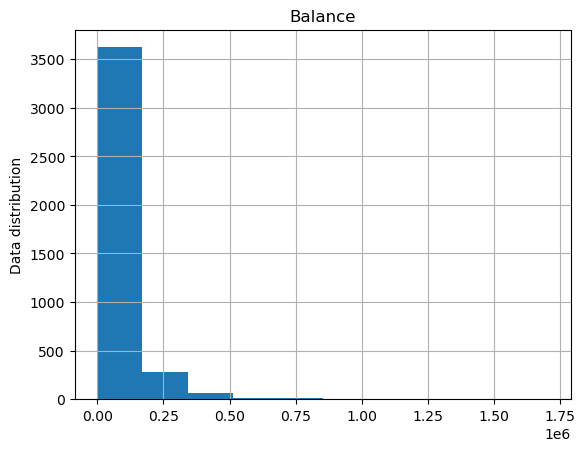

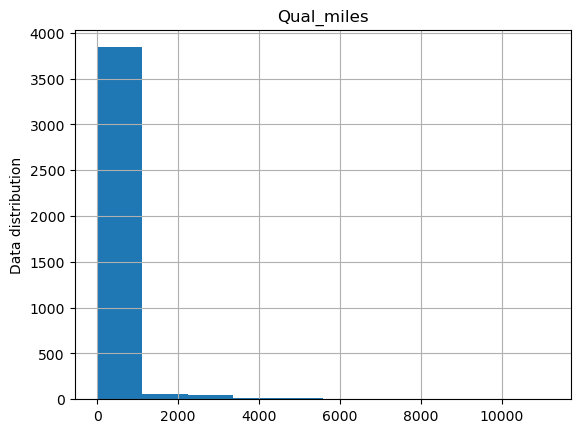

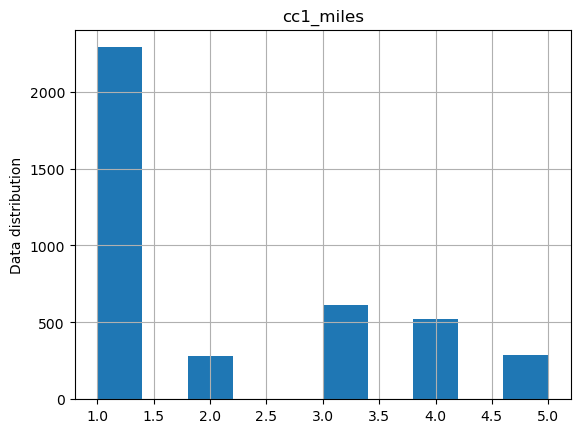

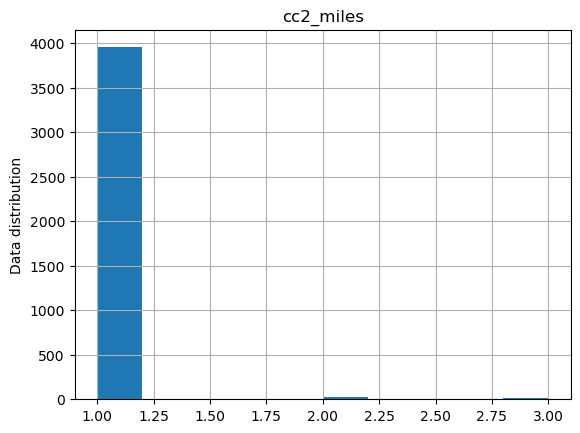

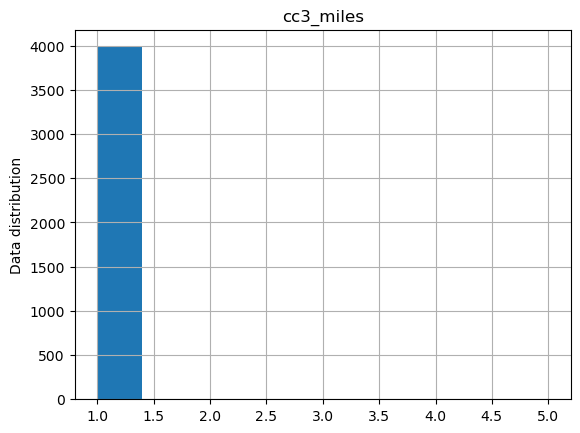

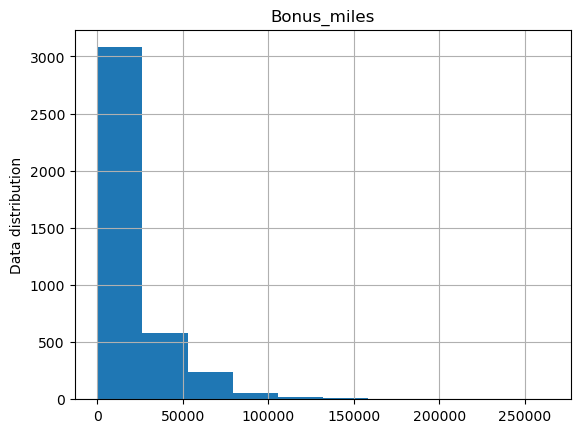

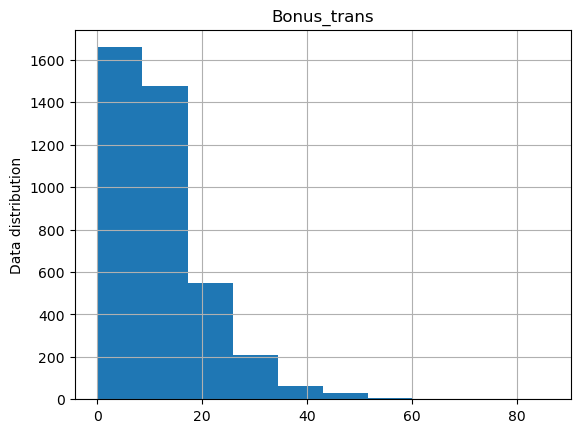

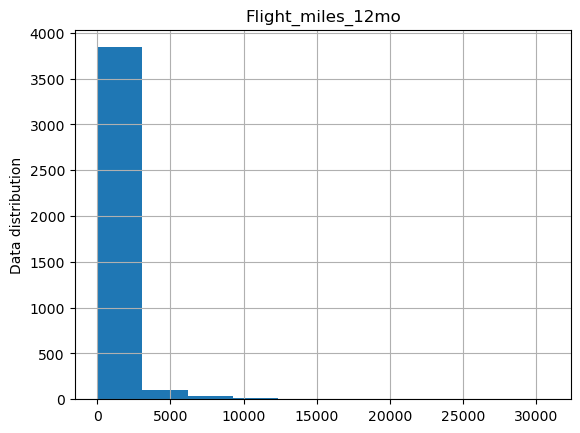

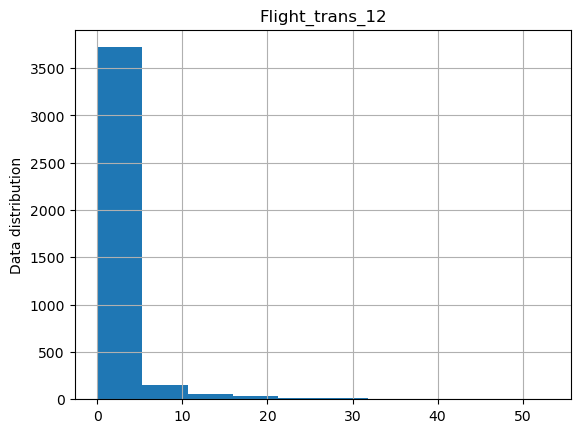

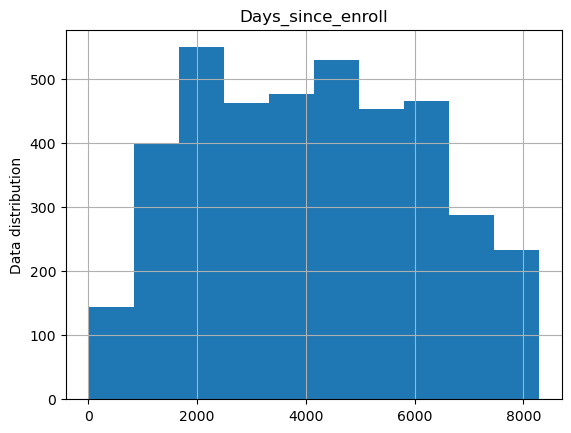

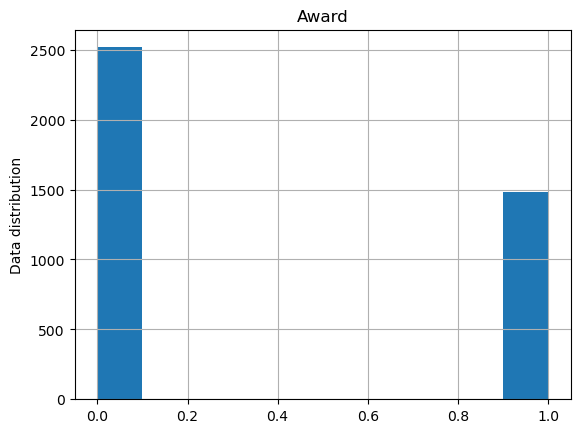

In [22]:
# Analyze the features by creating histograms to understand the distribution
for features in Cluster_data.columns:
        Cluster_data[features].hist(bins=10)
        plt.ylabel("Data distribution")
        plt.title(features)
        plt.show()

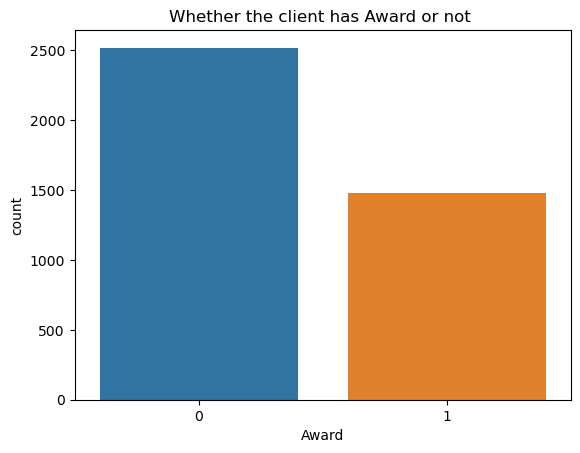

In [23]:
sns.countplot(x="Award",data=Cluster_data,order=Cluster_data["Award"].value_counts().index)
plt.title("Whether the client has Award or not ")
plt.show()

<Axes: xlabel='cc1_miles', ylabel='Qual_miles'>

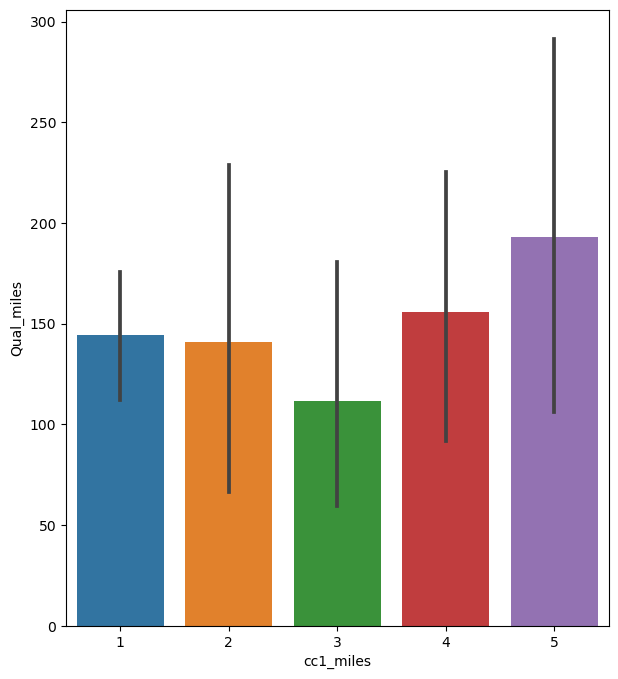

In [24]:
plt.figure(figsize=(7,8))
sns.barplot(x = 'cc1_miles', y = 'Qual_miles',data = Cluster_data)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

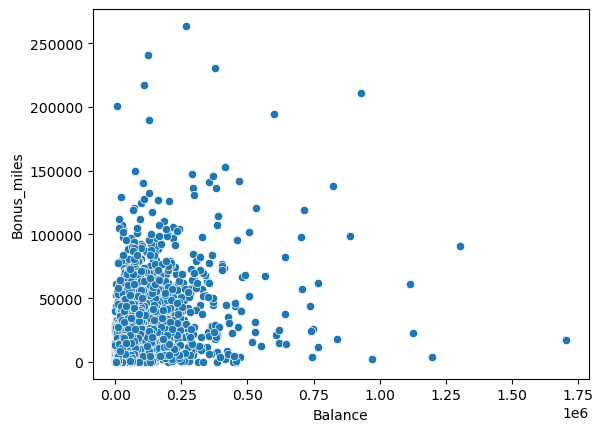

In [25]:
sns.scatterplot(x='Balance', y = 'Bonus_miles',data=Cluster_data)

In [26]:
#  Detecting Outliers 
Iso_for=IsolationForest(contamination=0.1,random_state=42)

Outliers=Iso_for.fit_predict(Cluster_data.select_dtypes(include=["float","int"]))

# Removing Outliers
Outliers_Rows=Outliers == -1 

Data_cleaned=Cluster_data[~Outliers_Rows] 

print("Number of actual data shape:-",{Cluster_data.shape})
print("Number of Outliers data shape:-",{sum(Outliers_Rows)})
print("Number of data shape after removing outliers:-",{Data_cleaned.shape})


Number of actual data shape:- {(3998, 11)}
Number of Outliers data shape:- {400}
Number of data shape after removing outliers:- {(3598, 11)}


<Axes: >

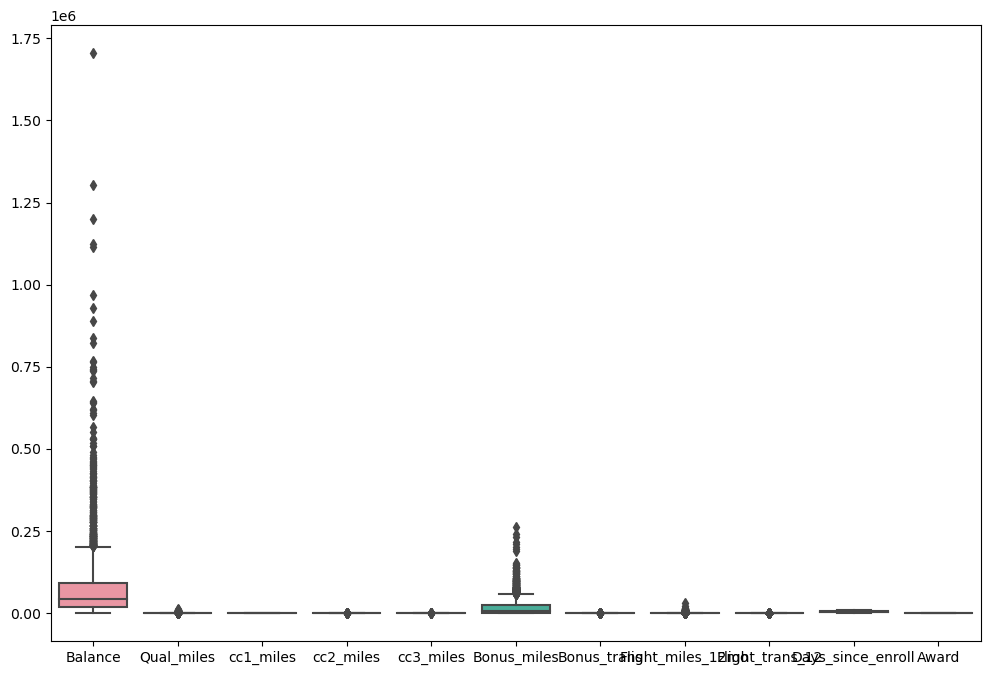

In [31]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=Cluster_data)

# Data Preprocessing 

In [32]:
# standardizing the data 
sta_sca=StandardScaler()
Cluster_scaled_data=sta_sca.fit_transform(Cluster_data)

In [33]:
# Implementing the K-Means Clustering
from sklearn.cluster import KMeans

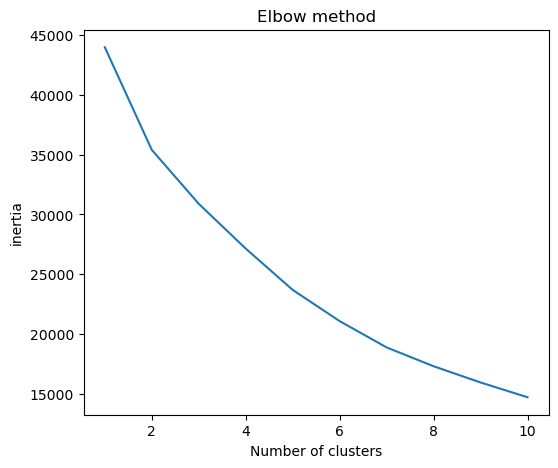

In [16]:
import warnings
warnings.filterwarnings("ignore")
kmeans = KMeans(n_clusters=6,random_state=42)
cluster = kmeans.fit(Cluster_scaled_data)
np.unique(cluster.labels_)

# Determine the optimal number of cluster to Elbow method 
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(Cluster_scaled_data)
    inertia.append(kmeans.inertia_)

# plot the elbow curve 
plt.figure(figsize=(6,5))
plt.plot(range(1,11),inertia)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()


In [65]:
# Apply K-Means Clustering with the optimal number of clusters
optimal_k=6
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans_cluster=kmeans.fit_predict(Cluster_scaled_data)
# cluster_labels for kmeans
labels_1=np.unique(kmeans.labels_)

# add the cluster labels to original data 
Cluster_data["Kmeans_cluster"]=kmeans_cluster

In [ ]:
# Experiment with different linkage criteria and apply Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

#  Define the linkage 
Linkage=["single","complete","average","ward"]

# create a figure to plot dendrogram
plt.figure(figsize=(6,5))

for i,criterion in enumerate(Linkage):
    plt.subplot(2,2,i+1)
    z=linkage(Cluster_scaled_data,method=criterion)
    dendrogram(z)
    plt.title(f'{criterion.capitalize()} Linkage')
plt.show()

In [59]:
# assume we choose "ward"  
from sklearn.cluster import AgglomerativeClustering
agglo_=AgglomerativeClustering(n_clusters=6,linkage="ward")
agglo_cluster=agglo_.fit_predict(Cluster_scaled_data)

# cluster_labels for Agglomerative 
labels_2=np.unique(agglo_.labels_)

# add the cluster to original data
Cluster_data["Agglomerative_Cluster"]=agglo_cluster

In [60]:
# apply DBSCAN with eps & min_samples
from sklearn.cluster import DBSCAN
 
# initialize the eps & min_samples
eps_values=[0.5,1.0,1.5,2.0]
min_values=[5,10,15,20]

for eps in eps_values:
    for mn in min_values:
        dbscan=DBSCAN(eps=eps,min_samples=mn)
        dbscan.fit_predict(Cluster_scaled_data)
        # Add the cluster labels to the original data
        Cluster_labels=f'DBscan_clusters_eps{eps}_min{min_samples}'
        Cluster_data["DBSCAN_Cluster"]=Cluster_labels
    
# taking random values of eps & min_samples 
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_clusters=dbscan.fit_predict(Cluster_scaled_data)

# Adding the cluster labels into original data 
Cluster_data["DBSCAN_Cluster"]=dbscan_clusters

# cluster labels for DBSCAN
labels_3=np.unique(dbscan.labels_)
    

In [52]:
# print after analyising the original data 
Cluster_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_cluster,Agglomerative_Cluster,DBSCAN_Cluster,DBSCAN_eps0.5_min20,DBSCAN_eps1.0_min20,DBSCAN_eps1.5_min20,DBSCAN_eps2.0_min20
ID,,,,,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0,0,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0,0,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0,0,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0,0,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,1,1,1,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,1,1,1,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,3,1,-1,-1,-1,-1,-1


In [71]:
# Evaluate the metrics using silhouette score 
from sklearn.metrics import silhouette_score

# Silhouette_score for kmeans
score_1=silhouette_score(Cluster_scaled_data,kmeans_cluster)
score_2=silhouette_score(Cluster_scaled_data,agglo_cluster)
score_3=silhouette_score(Cluster_scaled_data,dbscan_clusters)

In [72]:
print(score_1)
print(score_2)
print(score_3)

0.33271519311164616
0.31915519318858987
-0.07847654973330044


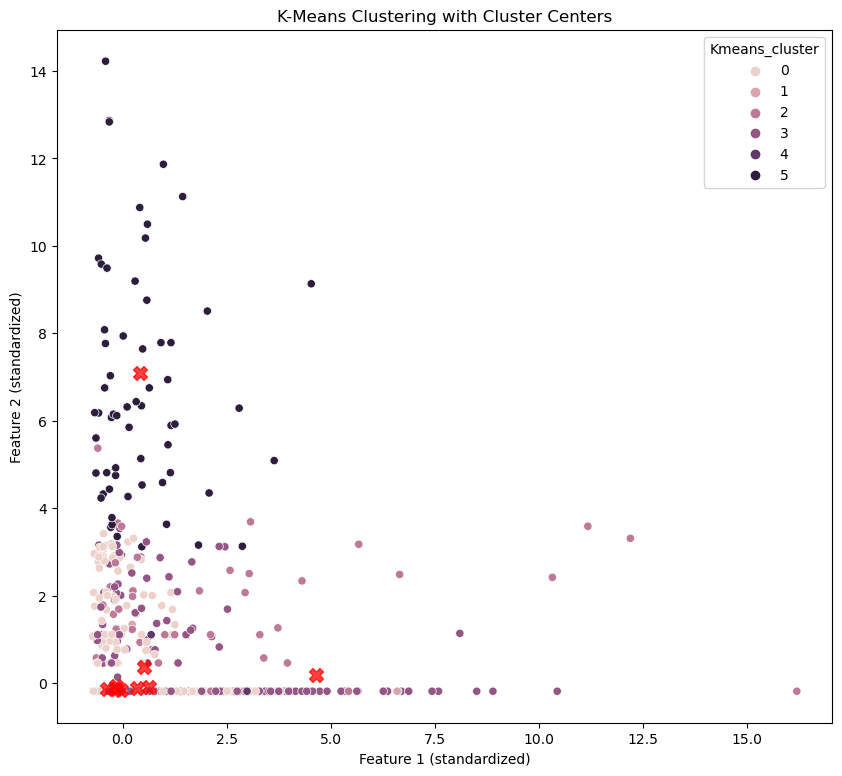

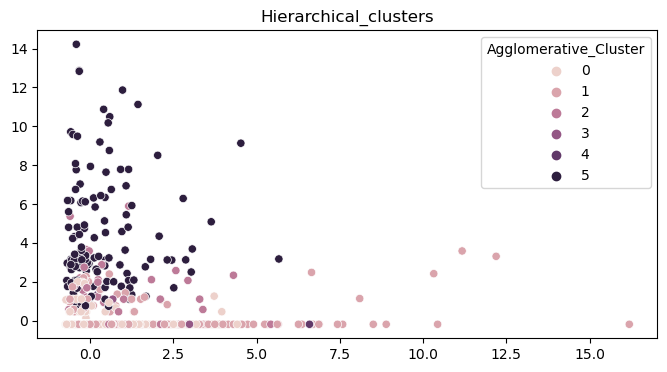

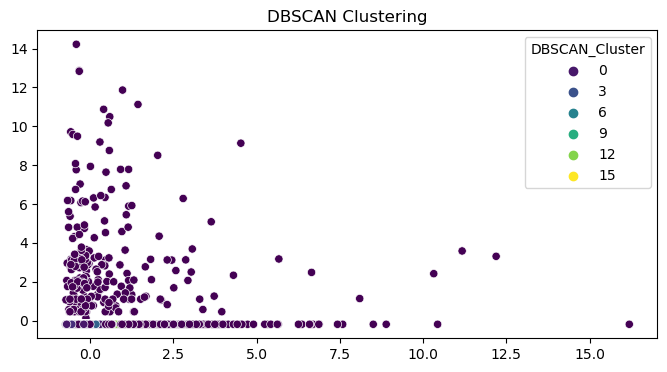

In [113]:
# visualize the data 

# visualize the kmeans 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,9))
sns.scatterplot(x=Cluster_scaled_data[:,0],y=Cluster_scaled_data[:,1], hue=Cluster_data["Kmeans_cluster"])
plt.title("Kmeans_clustering")
# plot the clusters centers
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',marker="X",s=100, alpha=0.75)
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.show()

# Visualize Hierarchical clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x=Cluster_scaled_data[:,0],y=Cluster_scaled_data[:,1],hue=Cluster_data["Agglomerative_Cluster"])
plt.title("Hierarchical_clusters")
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x=Cluster_scaled_data[:,0],y=Cluster_scaled_data[:,1],hue=Cluster_data["DBSCAN_Cluster"],palette="viridis")
plt.title('DBSCAN Clustering')
plt.show()
